In [943]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [944]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [945]:
bike.shape

(730, 16)

In [946]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Sanity Checks

In [948]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [949]:
bike.duplicated().sum()

0

# Data Cleaning & Transformation

In [951]:
bike.rename(columns = {'instant' : 'record_id',
                      'dteday': 'date',
                      'yr': 'year',
                      'mnth': 'month',
                      'holiday': 'is_holiday',
                      'workingday': 'is_workingday',
                      'weathersit': 'weather_situation',
                      'temp': 'temparature_C',
                      'atemp': 'feels_like_C',
                      'hum': 'humidity',
                      'casual': 'casual_users',
                      'registered': 'registered_users',
                      'cnt': 'total_rentals'}, inplace = True)

In [952]:
bike.head()

,record_id,date,season,year,month,is_holiday,weekday,is_workingday,weather_situation,temparature_C,feels_like_C,humidity,windspeed,casual_users,registered_users,total_rentals
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Converting the date column into datetime format**

In [954]:
bike.date = pd.to_datetime(bike.date, format = '%d-%m-%Y')

**Creating day of month column**

In [956]:
bike['day_of_month'] = bike.date.dt.day

**Mapping categorical columns to labels**

In [958]:
bike.season = bike.season.map({1: 'spring',
                2: 'summer',
                3: 'fall',
                4: 'winter'})

In [959]:
bike.weather_situation = bike.weather_situation.map({1: 'Clear/Partly Cloudy',
                        2: 'Mist/Cloudy',
                        3: 'Light Rain/Snow',
                        4: 'Heavy Rain/Snow'})

# Data Analysis and Visualizations

In [961]:
bike.head()

,record_id,date,season,year,month,is_holiday,weekday,is_workingday,weather_situation,temparature_C,feels_like_C,humidity,windspeed,casual_users,registered_users,total_rentals,day_of_month
0,1,2018-01-01,spring,0,1,0,1,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-01-02,spring,0,1,0,2,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,2018-01-03,spring,0,1,0,3,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,2018-01-04,spring,0,1,0,4,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,2018-01-05,spring,0,1,0,5,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


**Year wise total rentals**

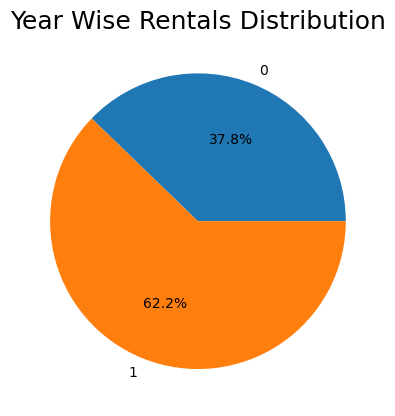

In [963]:
plt.pie(bike.groupby('year').total_rentals.sum(),
       labels = bike.groupby('year').total_rentals.sum().index,
       autopct = '%1.1f%%')

plt.title('Year Wise Rentals Distribution', fontdict= {'fontsize': 18})
plt.show()

**Season Wise Rentals**

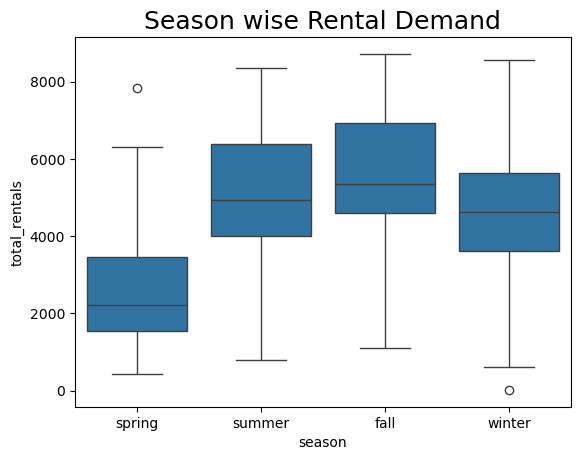

In [965]:
sns.boxplot(data = bike, x = "season", y = "total_rentals")
plt.title('Season wise Rental Demand', fontsize = 18)
plt.show()

In [966]:
bike.groupby('season').total_rentals.sum()

season
fall      1061129
spring     469514
summer     918589
winter     841613
Name: total_rentals, dtype: int64

**Weather situation effect in total rentals**

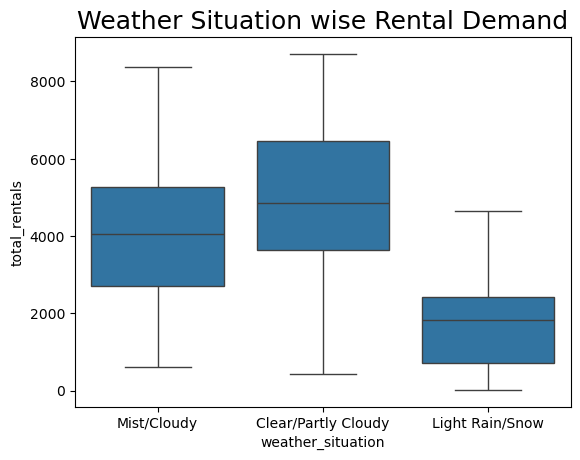

In [968]:
sns.boxplot(data = bike, x = "weather_situation", y = "total_rentals")
plt.title('Weather Situation wise Rental Demand', fontsize = 18)
plt.show()

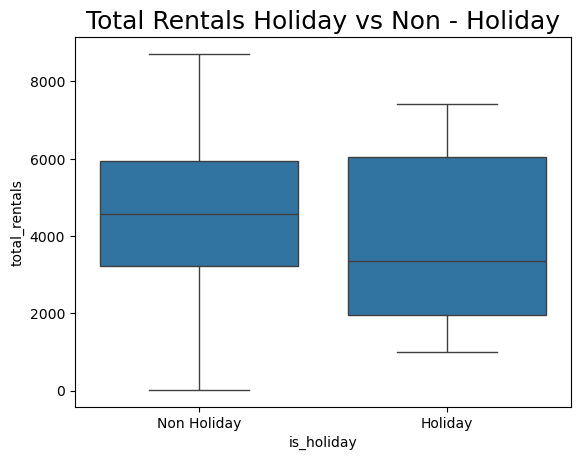

In [969]:
sns.boxplot(data = bike, x ='is_holiday', y = 'total_rentals')
plt.xticks([0, 1], ["Non Holiday", "Holiday"])

plt.title("Total Rentals Holiday vs Non - Holiday", fontsize = 18)
plt.show()

In [970]:
bike.head()

,record_id,date,season,year,month,is_holiday,weekday,is_workingday,weather_situation,temparature_C,feels_like_C,humidity,windspeed,casual_users,registered_users,total_rentals,day_of_month
0,1,2018-01-01,spring,0,1,0,1,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-01-02,spring,0,1,0,2,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,2018-01-03,spring,0,1,0,3,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,2018-01-04,spring,0,1,0,4,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,2018-01-05,spring,0,1,0,5,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


**Dropping unnecessary columns before data modelling**

- `record_id` = As this is just an index column, we can remove this.
- `date` = In our model date column will be problem to deal, so there are other columns which are derived from this date column which will be useful, and we will drop this column.
- `is_holiday` and `is_workingday` - These are columns are same, so it is better to keep just one column and remove the other, hence `is_workingday` column will be removed.

In [972]:
bike = bike.drop(columns = ['record_id', 'date', 'is_workingday'], axis = 1)
bike.head()

,season,year,month,is_holiday,weekday,weather_situation,temparature_C,feels_like_C,humidity,windspeed,casual_users,registered_users,total_rentals,day_of_month
0,spring,0,1,0,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,spring,0,1,0,2,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,spring,0,1,0,3,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,spring,0,1,0,4,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,spring,0,1,0,5,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


# Creating Dummy Variable for Categorical columns

In [974]:
bike = pd.get_dummies(bike, columns = ['season', 'weather_situation'], dtype = 'int', drop_first = True)
bike.head()

,year,month,is_holiday,weekday,temparature_C,feels_like_C,humidity,windspeed,casual_users,registered_users,total_rentals,day_of_month,season_spring,season_summer,season_winter,weather_situation_Light Rain/Snow,weather_situation_Mist/Cloudy
0,0,1,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,1
1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0,0,0,1
2,0,1,0,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,1,0,0,0,0
3,0,1,0,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,1,0,0,0,0
4,0,1,0,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,1,0,0,0,0


# Splitting the Data into Training and Test Sets

In [976]:
from sklearn.model_selection import train_test_split

In [977]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state= 100)

print("df_train", df_train.shape)
print("df_test", df_test.shape)

df_train (510, 17)
df_test (220, 17)


# Rescaling Features

In [979]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['month', 'weekday', 'temparature_C', 'feels_like_C', 'humidity', 'windspeed', 'casual_users', 'total_rentals', 'registered_users', 'day_of_month']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,month,is_holiday,weekday,temparature_C,feels_like_C,humidity,windspeed,casual_users,registered_users,total_rentals,day_of_month,season_spring,season_summer,season_winter,weather_situation_Light Rain/Snow,weather_situation_Mist/Cloudy
576,1,0.545455,0,0.500000,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1.000000,0,0,0,0,0
426,1,0.181818,0,0.000000,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0.066667,1,0,0,0,1
728,1,1.000000,0,0.166667,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0.966667,1,0,0,0,0
482,1,0.272727,0,0.000000,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0.900000,0,1,0,0,1
111,0,0.272727,0,0.000000,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0.700000,0,1,0,0,1


In [980]:
df_train.describe()

,year,month,is_holiday,weekday,temparature_C,feels_like_C,humidity,windspeed,casual_users,registered_users,total_rentals,day_of_month,season_spring,season_summer,season_winter,weather_situation_Light Rain/Snow,weather_situation_Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.491830,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.486405,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.315038,0.157763,0.329528,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.297061,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.733333,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


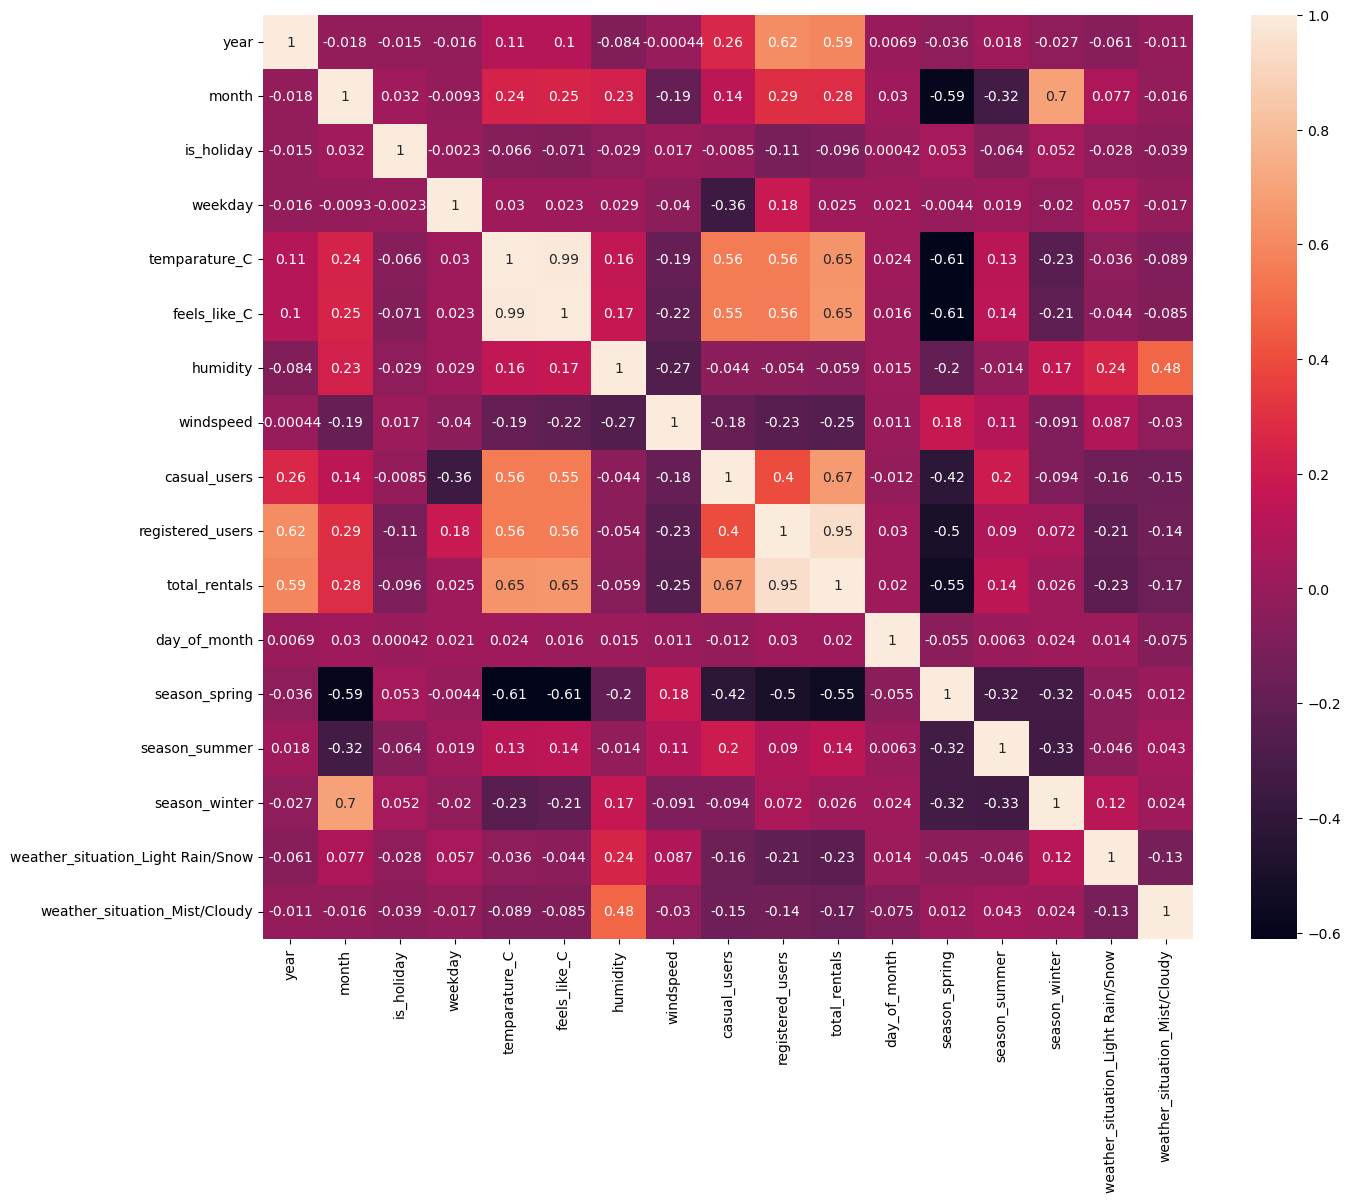

In [981]:
plt.figure(figsize = (15, 12))
sns.heatmap(df_train.corr(), annot = True, cbar = True)
plt.show()

In [982]:
X_train = df_train.drop('total_rentals', axis = 1)
y_train = df_train.total_rentals

In [983]:
X_train.shape

(510, 16)

# Using RFE(Recursive Feature Elimination) to choose variable

In [985]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 12)
rfe = rfe.fit(X_train, y_train)

In [986]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', False, 5),
 ('month', True, 1),
 ('is_holiday', False, 3),
 ('weekday', True, 1),
 ('temparature_C', True, 1),
 ('feels_like_C', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('casual_users', True, 1),
 ('registered_users', True, 1),
 ('day_of_month', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_situation_Light Rain/Snow', False, 4),
 ('weather_situation_Mist/Cloudy', False, 2)]

In [987]:
col = X_train.columns[rfe.support_]
col

Index(['month', 'weekday', 'temparature_C', 'feels_like_C', 'humidity',
       'windspeed', 'casual_users', 'registered_users', 'day_of_month',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

# Model Building using statsmodel

In [989]:
X_train_rfe = X_train[col]

In [990]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.384e+29
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:28:47   Log-Likelihood:                 16659.
No. Observations:                 510   AIC:                        -3.329e+04
Df Residuals:                     497   BIC:                        -3.324e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              2.22e-16   6.74e-16  

In [991]:
X_train_rfe.drop('month', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [992]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.544e+30
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:28:47   Log-Likelihood:                 16920.
No. Observations:                 510   AIC:                        -3.382e+04
Df Residuals:                     498   BIC:                        -3.376e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              2.22e-16   3.81e-16  

In [1037]:
X_train_rfe.drop('temparature_C', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [1039]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.788e+30
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:30:16   Log-Likelihood:                 17104.
No. Observations:                 510   AIC:                        -3.419e+04
Df Residuals:                     499   BIC:                        -3.414e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.943e-16   2.64e-16  

In [1041]:
X_train_rfe.drop('day_of_month', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [1043]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.968e+31
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:31:01   Log-Likelihood:                 17568.
No. Observations:                 510   AIC:                        -3.512e+04
Df Residuals:                     500   BIC:                        -3.507e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.388e-16   1.04e-16  

In [1045]:
X_train_rfe.drop('humidity', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [1047]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.097e+30
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:31:28   Log-Likelihood:                 17060.
No. Observations:                 510   AIC:                        -3.410e+04
Df Residuals:                     501   BIC:                        -3.406e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.274e-16   2.28e-16  

In [1049]:
X_train_rfe.drop('season_spring', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [1051]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.521e+30
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:31:54   Log-Likelihood:                 17139.
No. Observations:                 510   AIC:                        -3.426e+04
Df Residuals:                     502   BIC:                        -3.423e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.089e-15   1.19e-16  

In [1053]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,feels_like_C,11.79
4,registered_users,10.79
3,casual_users,4.99
0,weekday,3.99
2,windspeed,2.97
5,season_summer,1.58
6,season_winter,1.52


In [1055]:
X_train_rfe.drop('feels_like_C', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [1057]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.373e+31
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:32:55   Log-Likelihood:                 17332.
No. Observations:                 510   AIC:                        -3.465e+04
Df Residuals:                     503   BIC:                        -3.462e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.078e-16   7.55e-17  

In [1059]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered_users,7.91
2,casual_users,3.72
0,weekday,3.70
1,windspeed,2.82
4,season_summer,1.58
5,season_winter,1.46


In [1061]:
X_train_rfe.drop('season_summer', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [1063]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.151e+31
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:33:39   Log-Likelihood:                 17427.
No. Observations:                 510   AIC:                        -3.484e+04
Df Residuals:                     504   BIC:                        -3.482e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.788e-16   6.25e-17  

In [1065]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered_users,7.89
0,weekday,3.67
2,casual_users,3.60
1,windspeed,2.72
4,season_winter,1.32


In [1067]:
X_train_rfe.drop('season_winter', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [1069]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.061e+32
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:34:33   Log-Likelihood:                 17779.
No. Observations:                 510   AIC:                        -3.555e+04
Df Residuals:                     505   BIC:                        -3.553e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.331e-16   3.06e-17  

In [1071]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered_users,7.41
0,weekday,3.66
2,casual_users,3.55
1,windspeed,2.70


In [1073]:
X_train_rfe.drop('registered_users', axis = 1, inplace = True)
X_train_new = X_train_rfe

In [1075]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          total_rentals   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     199.2
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           2.69e-85
Time:                        19:35:12   Log-Likelihood:                 237.77
No. Observations:                 510   AIC:                            -467.5
Df Residuals:                     506   BIC:                            -450.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2488      0.024     10.363   

In [1077]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.59
0,weekday,2.13
2,casual_users,1.69


# Residual Analysis

Checking if the error terms are distributed normally.

In [1081]:
y_train_pred = lm.predict(X_train_lm)

<Axes: ylabel='Density'>

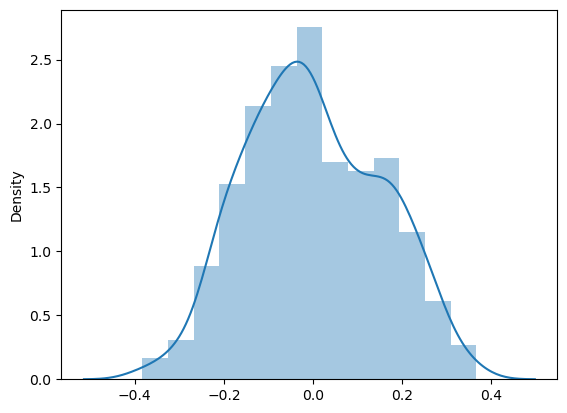

In [1083]:
sns.distplot(y_train - y_train_pred)

# Making Predictions

In [1086]:
num_vars

['month',
 'weekday',
 'temparature_C',
 'feels_like_C',
 'humidity',
 'windspeed',
 'casual_users',
 'total_rentals',
 'registered_users',
 'day_of_month']

In [1088]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1090]:
X_test = df_test.drop('total_rentals', axis = 1)
y_test = df_test.total_rentals

In [1094]:
X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,weekday,windspeed,casual_users
184,0.500000,0.084219,0.933557
535,0.666667,0.153728,0.265163
299,1.000000,0.334206,0.072539
221,0.833333,0.339570,0.268820
152,1.000000,0.537414,0.223712


In [1096]:
X_test_new = sm.add_constant(X_test_new)

In [1098]:
y_pred = lm.predict(X_test_new)

In [1100]:
from sklearn.metrics import r2_score

In [1104]:
r2_score(y_test, y_pred)

0.5558332980799077